In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
car = pd.read_csv('quikr_car.csv')

In [4]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
car = car[car['year'].str.isnumeric()]
car['year'] = car['year'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [6]:
car = car[car['Price']!="Ask For Price"]
car['Price'] = car['Price'].str.replace(',','').astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [7]:
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [8]:
car[car['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [9]:
car = car[~car['fuel_type'].isna()]
car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')
car = car.reset_index(drop=True)

In [10]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
numeric_col = ['year','Price','kms_driven']
car_num = car[numeric_col]
car_num.head()

,year,Price,kms_driven
0,2007,80000,45000
1,2006,425000,40
2,2014,325000,28000
3,2014,575000,36000
4,2012,175000,41000


# Data Visualization

In [14]:
corr = car_num.corr()
corr

,year,Price,kms_driven
year,1.000000,0.287193,-0.233695
Price,0.287193,1.000000,-0.120854
kms_driven,-0.233695,-0.120854,1.000000


<AxesSubplot:>

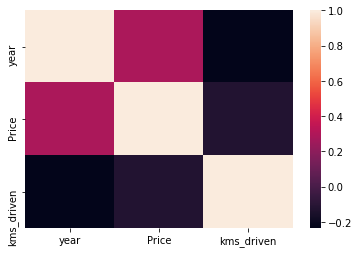

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

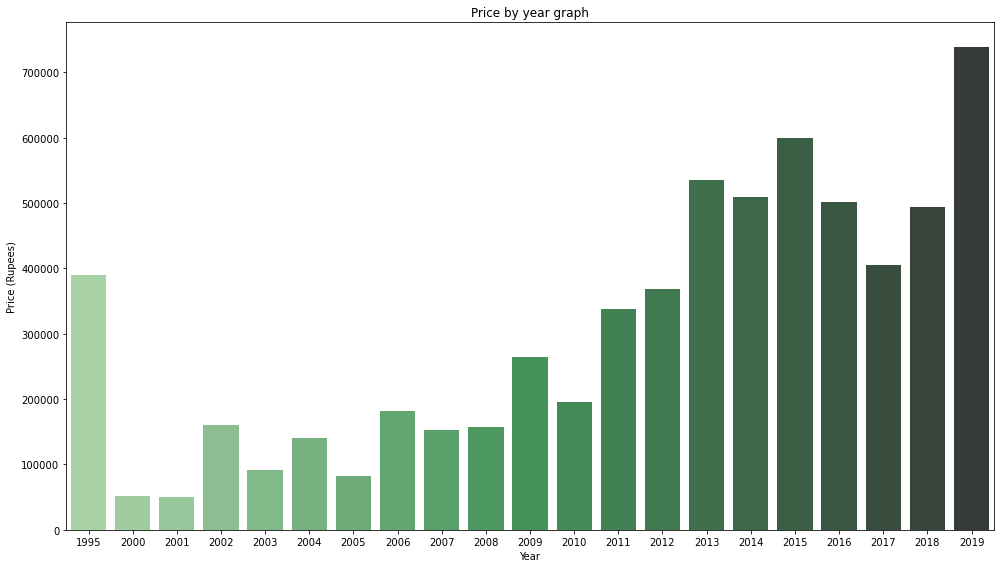

In [16]:
year_price = car.groupby('year')['Price'].mean().sort_values()

plt.figure(figsize=(14, 8))
plt.title("Price by year graph")
pal = sns.color_palette("Greens_d", len(year_price))

sns.barplot(x=year_price.index, y=year_price.values, palette=pal)

plt.xlabel("Year")
plt.ylabel("Price (Rupees)")
plt.tight_layout()

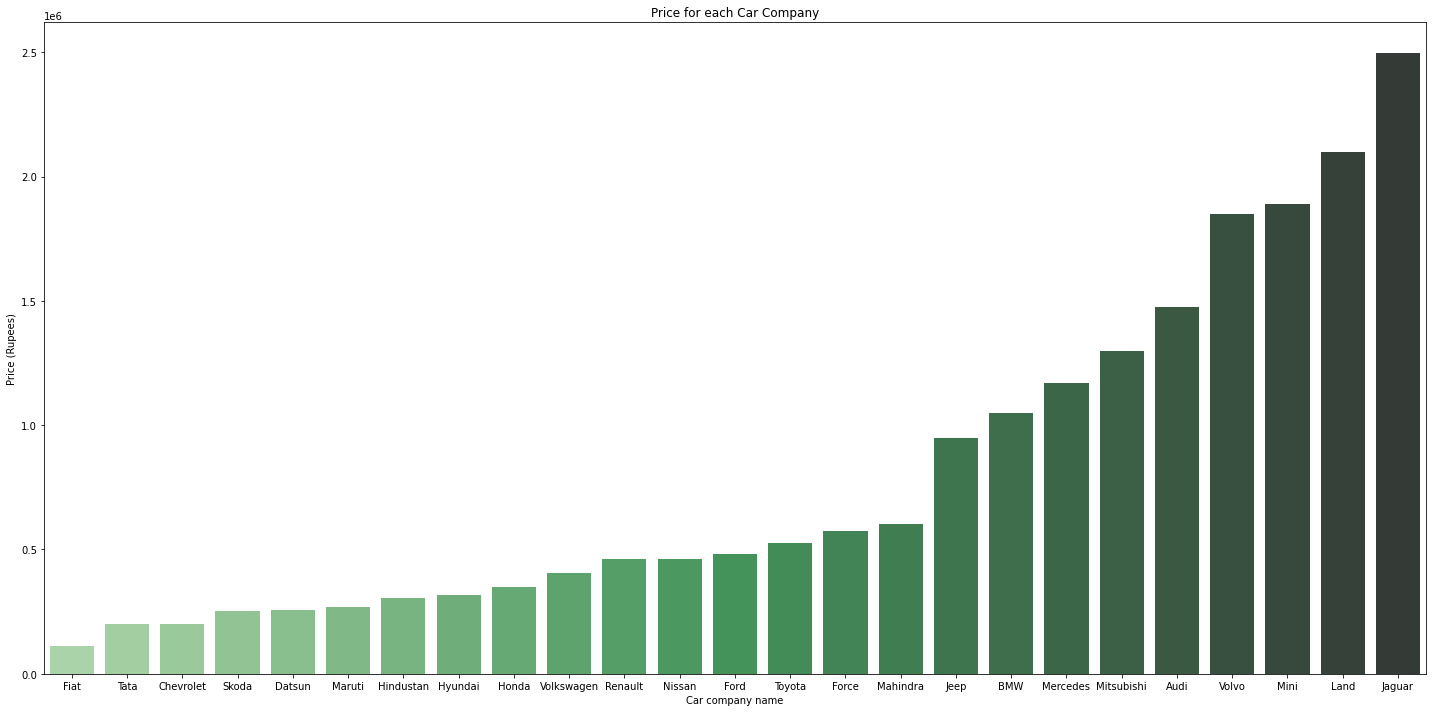

In [17]:
model_price = car.groupby('company')['Price'].mean().sort_values()

plt.figure(figsize=(20, 10))
plt.title("Price for each Car Company")
pal = sns.color_palette("Greens_d", len(model_price))

sns.barplot(x=model_price.index, y=model_price.values, palette=pal)

plt.xlabel("Car company name")
plt.ylabel("Price (Rupees)")
plt.tight_layout()

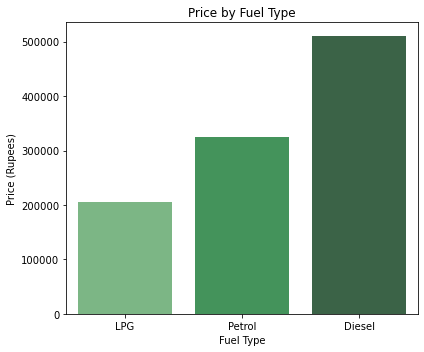

In [18]:
fuelType_price = car.groupby('fuel_type')['Price'].mean().sort_values()

plt.figure(figsize=(6, 5))
plt.title("Price by Fuel Type")
pal = sns.color_palette("Greens_d", len(fuelType_price))

sns.barplot(x=fuelType_price.index, y=fuelType_price.values, palette=pal)

plt.xlabel("Fuel Type")
plt.ylabel("Price (Rupees)")
plt.tight_layout()

<AxesSubplot:xlabel='year', ylabel='Price'>

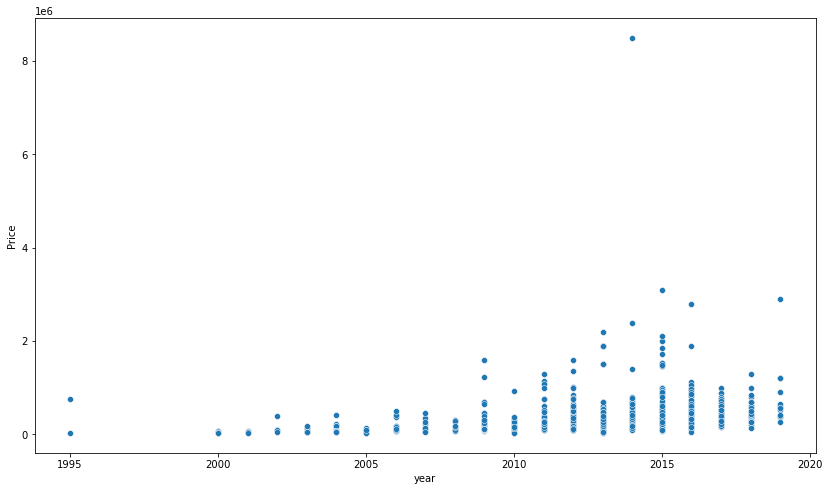

In [19]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=car_num['year'], y=car_num['Price'])

<AxesSubplot:ylabel='company'>

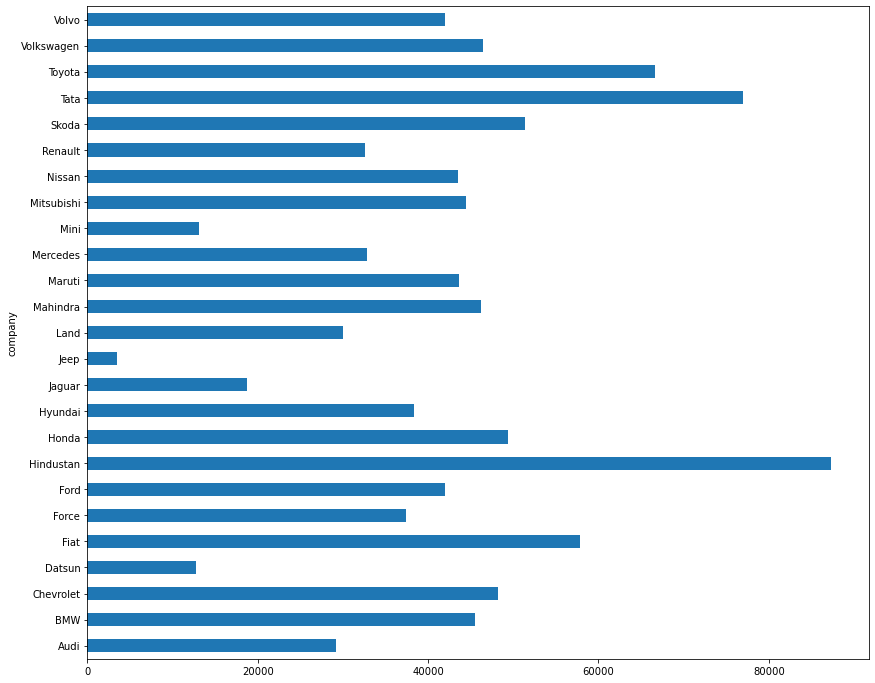

In [20]:
plt.figure(figsize=(14,12))
car.groupby('company')['kms_driven'].mean().plot.barh()

<AxesSubplot:ylabel='fuel_type'>

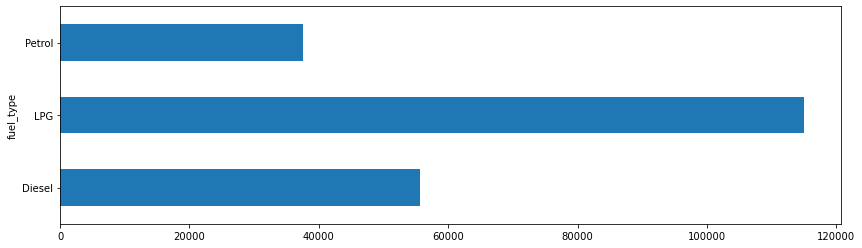

In [21]:
plt.figure(figsize=(14,4))
car.groupby('fuel_type')['kms_driven'].mean().plot.barh()

# One Hot encoding

In [22]:
X = car.drop(columns = 'Price')
y = car['Price']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [25]:
ohe = OneHotEncoder()

In [26]:
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [27]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [28]:
rfg = RandomForestRegressor()

In [29]:
pipe = make_pipeline(column_trans,rfg)

In [30]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [31]:
y_pred = pipe.predict(X_test)

In [32]:
r2_score(y_test,y_pred)

0.7527300420442248

In [33]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [34]:
import numpy as np

In [35]:
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=i)
    lr = RandomForestRegressor()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    print(r2_score(y_test,y_pred), i)
    scores.append(r2_score(y_test, y_pred))

0.5767439125298663 0
0.5202559450416282 1
0.6046835060864508 2
0.6055376842168697 3
0.8778921842447643 4
0.6891597821110828 5
0.637829245389133 6
0.5910842477533108 7
0.18850936129759188 8
0.6125935735280107 9


In [36]:
scores[np.argmax(scores)]

0.8778921842447643

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=np.argmax(scores))
rfr = RandomForestRegressor()
pipe = make_pipeline(column_trans, rfr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8675977928276211

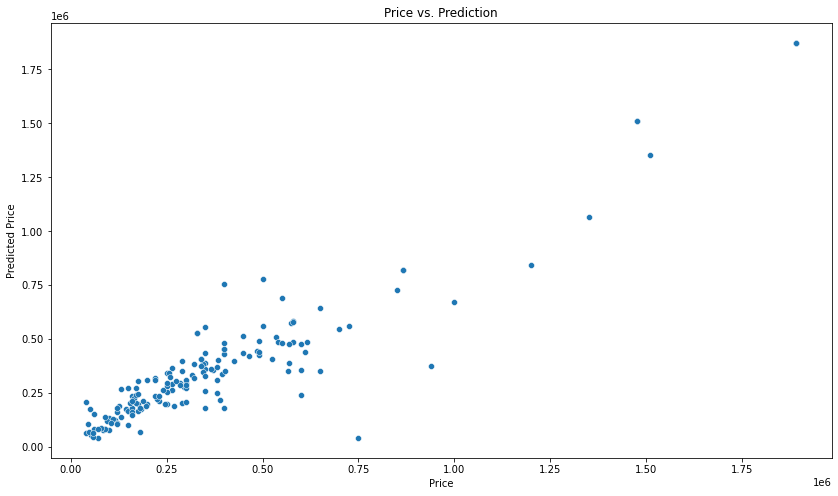

In [38]:
plt.figure(figsize=(14,8))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Price vs. Prediction', 
                                               xlabel="Price", 
                                               ylabel="Predicted Price")